# Arrosage  ...

M. Dupont a creusé un puits dans son jardin pour arroser son potager. Il utilise une pompe pour élever l'eau du puits vers son potager, pompe qui communique au fluide une puissance $\Pi$. Les dimensions de l'installation sont données sur la figure ci-dessous. Le tuyau d'arrosage est de rayon $R$ et de longueur totale $L$ (de 1 à 5). On suppose qu'il y a des pertes de charges $\Delta J$ sur toute la longueur du tuyau et qu'elles peuvent être modélisées par l'équation de Poiseuille :
$$\Delta J=\frac{8\mu L}{\pi R^4}Q$$
où $Q$ est le débit volumique de l'eau dans le tuyau, l est la longueur du tuyau considérée et $\mu$ la viscosité de l'eau. On suppose que l'écoulement est permanent et que l'eau est un fluide incompressible.

<img src="fig-arrosage-puit.png" width="50%"/>

1. Quel débit maximal d'eau peut obtenir M. Dupont dans son potager ?
2. M Dupont ouvre grand le robinet de sa pompe pour arroser son jardin mais, alors que tout est en ordre, il n'y a pas d'eau en sortie de tuyau. Expliquez ce qui se passe en le justifiant par des calculs.
3. En discutant avec ses voisins, il se retrouve avec plusieurs solutions :
    * lui veut acheter une pompe plus puissante (puissance $\Pi_1$) et ne pas modifier son installation.
    * son voisin, ingénieur UTC, lui propose d'acheter un tuyau avec un rayon $R_1 = $1 cm.
    * son ami, ingénieur UTT, lui propose de ne rien acheter mais de déplacer sa pompe pour l'immerger à la profondeur $H = h_1 + h_2$
En justifiant vos réponses par des calculs choisissez la meilleure des solutions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Données :
Ppompe = 160  # Puissance de la pompe en W.
L = 30        # Longueur du tuyau en m.
h1 = 2        # Profondeur d'aspiration en m.
h2 = 8        # Profondeur surface libre de l'eau en m.
R = 0.5*1e-2  # Rayon tuyau en m.

rho = 1000
g = 9.81
mu = 1e-3
Patm = 1e5 # Pression atmo en Pa.

1) Quel débit maximal d'eau peut obtenir M. Dupont dans son potager ?

Si on applique Bernouilli généralisé entre un point 2 à la surface libre de l'eau (mais pas dans le tuyau !!) et un point à la sortie du tuyau en 5.

$$\left(P_5 + \rho g z_5 + \frac{1}{2}\rho v_5^2\right) - \left(P_2 + \rho g z_2 + \frac{1}{2}\rho v_2^2\right) = \frac{\Pi}{Q} - \Delta J_\text{sur $L$}$$

Avec $P_5=P_2=P_{atm}$, $z_5=0$ et $z_2=-h_2$, $v_2\simeq 0$ et $v_5=\dfrac{Q}{\pi R^2}$

On a :
$$ \frac{\rho Q^2}{2(\pi R^2)^2} + \rho g h_2 = \frac{\Pi}{Q} - \frac{8\mu L}{\pi R^4}Q$$

Donc le débit $Q$ est solution de cette équation polynomiale de degré 3.

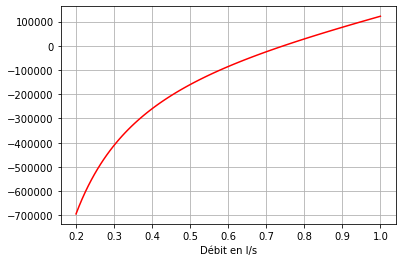

In [17]:
a = rho/(2*(np.pi*R**2)**2)
b = rho*g*h2
c = (8*mu)/(np.pi*R**4)

# On trace la fonction pour Q entre 0.2 et 1 l/s -> on passe en unité SI: m3/s
# Ces bornes sont ajustées par quelques essais sucessifs ..
Q = np.linspace(0.2,1,100)/1e3

def fQ(Q):
    return a*Q**2 + b - Ppompe/Q + c*Q*L

plt.plot(Q*1e3,fQ(Q),'r-')
plt.xlabel('Débit en l/s')
plt.grid()

Graphiquement on voit que le débit "théorique" serait de : $\simeq$0.75 l/s.
On peut aussi résoudre numériquement l'équation avec la méthode de [Newton-Raphson](https://fr.wikipedia.org/wiki/Méthode_de_Newton) par exemple :

In [9]:
from scipy import optimize
# Appel de la méthode de newton
Q0 = optimize.newton(fQ,x0=0.2/1e3,fprime=None)
print('Débit théorique : %.3f l/s'%(Q0*1e3))

Débit théorique : 0.745 l/s


2/ En pratique pas de débit !!!

Pourquoi ?
* On a appliqué Bernouilli généralisé entre 2 et 5 qui est une équation traduisant la conservation de l'énergie volumique dans l'écoulement avec les apports et les pertes entre le départ et l'arrivée. Par contre on n'a pas vérifier qu'en tout point de l'écoulement les conditions de celui-ci, i.e en particulier la pression dans le fluide ...

* Vérifions la pression en 3 en appliquant Bernouilli généralisé entre 2 à la surface du libre et 3 à l'entrée de la pompe :

$$\left(P_3 + \rho g z_3 + \frac{1}{2}\rho v_3^2\right) - \left(P_2 + \rho g z_2 + \frac{1}{2}\rho v_2^2\right) =  - \Delta J_\text{sur $h_1 + h_2$ }$$

Avec $P_2=P_{atm}$, $z_3=0$ et $z_2=-h_2$, $v_2\simeq 0$ et $v_3=\dfrac{Q}{\pi R^2}$

On a :

$$ P_3 + \frac{\rho Q^2}{2(\pi R^2)^2} -P_{atm} + \rho g h_2 = - \frac{8\mu (h_1 + h_2)}{\pi R^4}Q\label{P3}$$

Pression pour le débit théorique -53893.95 Pa


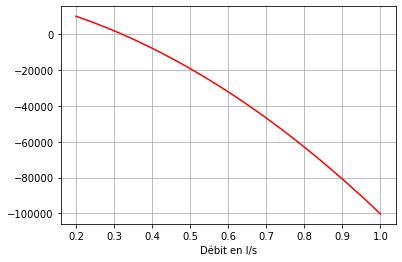

In [18]:
# Fonction P3(Q)
def P3(Q):
    return Patm - b -c*(h1+h2)*Q - a*Q**2
# Tracé
plt.plot(Q*1e3,P3(Q),'r-')
plt.grid()
plt.xlabel('Débit en l/s')

print('Pression pour le débit théorique %.2f Pa'%P3(Q0))

#### On voit que sur la plage de débit la pression $P_3$ est toujours négative !!! $\to$ écoulement impossible !!

-----
* Solution 1, tuyau de plus grand diamètre : $R_1=1$cm

On recalcule le débit théorique et la pression en 3 :

In [11]:
R1 = 1*1e-2
a = rho/(2*(np.pi*R1**2)**2)
c = (8*mu)/(np.pi*R1**4)

def fQ(Q):
    return a*Q**2 + b - Ppompe/Q + c*Q*L

def P3(Q):
    return Patm - b -c*(h1+h2)*Q - a*Q**2

QR1 = optimize.newton(fQ,x0=0.01*60/1e3,fprime=None)
print('Débit théorique : %.3f l/s'%(QR1*1e3))
print('Pression en 3 :%.3f Pa'%P3(Q0))

Débit théorique : 1.558 l/s
Pression en 3 :16806.628 Pa


### ça marche !!

En traçant la courbe $P_3(Q)$ on peut connaître le débit maxi de l'installation (ce qui supposerait d'augmenter la puissance de la pompe !) :

Débit maxi : 1.825 l/s


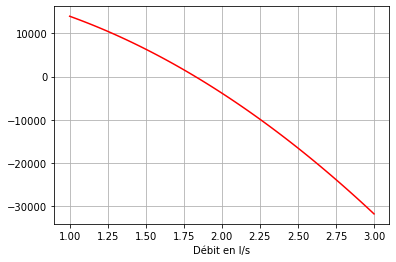

In [12]:
# Tracé
Q = np.linspace(1,3,100)/1e3
plt.plot(Q*1e3,P3(Q),'r-')
plt.grid()
plt.xlabel('Débit en l/s')
Qmax = optimize.newton(P3,x0=1/1e3,fprime=None)
print('Débit maxi : %.3f l/s'%(Qmax*1e3))

In [13]:
Ppompe_max = a*Qmax**3 + b*Qmax + c*Qmax**2
print('Puissance de la pompe pour Qmax : %.0f W'%(Ppompe_max))

Puissance de la pompe pour Qmax : 175 W


----
* Solution 2 : On place la pompe en 1, (donc nécessité d'une pompe immersible, donc étanche)

Dans ce cas bernouilli généralisé entre 2 et 3 s'écrit :

$$ P_3 + \frac{\rho Q^2}{2(\pi R^2)^2} -P_{atm} + \rho g h_2 = \frac{\Pi}{Q}  - \frac{8\mu (h_1 + h_2)}{\pi R^4}Q$$

In [14]:
R = 0.5*1e-2
a = rho/(2*(np.pi*R**2)**2)
c = (8*mu)/(np.pi*R**4)

def P3(Q):
    return Patm + Ppompe/Q - b -c*(h1+h2)*Q - a*Q**2

print('Débit théorique : %.3f l/s'%(Q0*1e3))
print('Pression en 3 :%.3f Pa'%P3(Q0))
print('Soit : %.3fxPatm'%(P3(Q0)/Patm))

Débit théorique : 0.745 l/s
Pression en 3 :160744.019 Pa
Soit : 1.607xPatm


## ça marche !!!

Reste à comparer le coût de 30m d'un tuyau 2x plus gros et la différence entre celui d'une pompe de surface et immergée ...